In [1]:
import pandas as pd
import cv2
import os
import numpy as np

In [2]:
csv_path = "Hollywood.csv"
df = pd.read_csv(csv_path)
print(df.head(100))

                         id             label
0   Robert Downey Jr_87.jpg  Robert Downey Jr
1        Lisa Kudrow_64.jpg       Lisa Kudrow
2    Ellen Degeneres_34.jpg   Ellen Degeneres
3       Billie Eilish_3.jpg     Billie Eilish
4         Tom Cruise_21.jpg        Tom Cruise
..                      ...               ...
95            Marmik_26.jpg            Marmik
96   Charlize Theron_51.jpg   Charlize Theron
97       Lisa Kudrow_56.jpg       Lisa Kudrow
98      Courtney Cox_47.jpg      Courtney Cox
99      Andy Samberg_62.jpg      Andy Samberg

[100 rows x 2 columns]


In [3]:
image_folder = "ImagesHD/ImagesHD"

image_files = os.listdir(image_folder)

In [4]:
image_files = sorted(image_files)


resized_images = []
image_ids = []

for filename in image_files:
    file_path = os.path.join(image_folder, filename)


    img = cv2.imread(file_path)
    resized_img = cv2.resize(img, (128, 128))
    img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb / 255.0
    resized_images.append(img_normalized)
    image_ids.append(filename.split('.')[0])

print(f"Shape of the first resized image: {resized_images[0].shape}")

resized_images = np.array(resized_images)

df['image_id'] = df['id'].apply(lambda x: x.split('.')[0])

print("CSV image IDs:", df['image_id'].head())
print("File image IDs:", image_ids[:5])

image_dict = {image_ids[i]: resized_images[i] for i in range(len(image_ids))}

def get_image(image_id):
    return image_dict.get(image_id, None)

df['image'] = df['image_id'].apply(get_image)

first_image_data = df.iloc[0]['image']
print(f"Image data for the first record: {first_image_data.shape}")

X = np.array(df['image'].tolist(), dtype=np.float32)
y = np.array(df['label'].values)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Shape of the first resized image: (128, 128, 3)
CSV image IDs: 0    Robert Downey Jr_87
1         Lisa Kudrow_64
2     Ellen Degeneres_34
3        Billie Eilish_3
4          Tom Cruise_21
Name: image_id, dtype: object
File image IDs: ['Alexandra Daddario_0', 'Alexandra Daddario_1', 'Alexandra Daddario_10', 'Alexandra Daddario_11', 'Alexandra Daddario_12']
Image data for the first record: (128, 128, 3)
Training data shape: (1515, 128, 128, 3)
Test data shape: (379, 128, 128, 3)


In [5]:
from tensorflow.keras import backend as K


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential([

    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    BatchNormalization(),
    AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
   AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
   AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
    AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
     AveragePooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
     AveragePooling2D(2, 2),




    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu',  kernel_regularizer=tf.keras.regularizers.L2(0.5) ),

    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.summary()

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
     monitor='val_loss',
    factor=0.5,
    patience=6,
    min_lr=1e-6,
    verbose=1
)


history = model.fit(
        X_train, y_train

    ,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=16,
    callbacks=[early_stopping, lr_scheduler]
)

C:\Users\usr01\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 32, 32, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 16, 16, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 8, 8, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 4, 4, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             5

 Total params: 813,078 (3.10 MB)

 Trainable params: 811,542 (3.10 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.0860 - loss: 62.0204 - val_accuracy: 0.0712 - val_loss: 6.6461 - learning_rate: 0.0010
Epoch 2/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.1726 - loss: 4.6671 - val_accuracy: 0.0607 - val_loss: 3.9857 - learning_rate: 0.0010
Epoch 3/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.2401 - loss: 3.0665 - val_accuracy: 0.0607 - val_loss: 3.8931 - learning_rate: 0.0010
Epoch 4/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.2709 - loss: 2.9518 - val_accuracy: 0.0765 - val_loss: 4.4225 - learning_rate: 0.0010
Epoch 5/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.3145 - loss: 2.8688 - val_accuracy: 0.1214 - val_loss: 3.7035 - learning_rate: 0.0010
Epoch 6/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.3600 - loss: 2.6694 - val_accuracy: 0.0712 - val_loss: 4.4112 - learning_rate: 0.0010
Epoch 7/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.3908 - loss: 2.5428 - val_ac

In [6]:
model.save('facerecognitionmodel.h5')

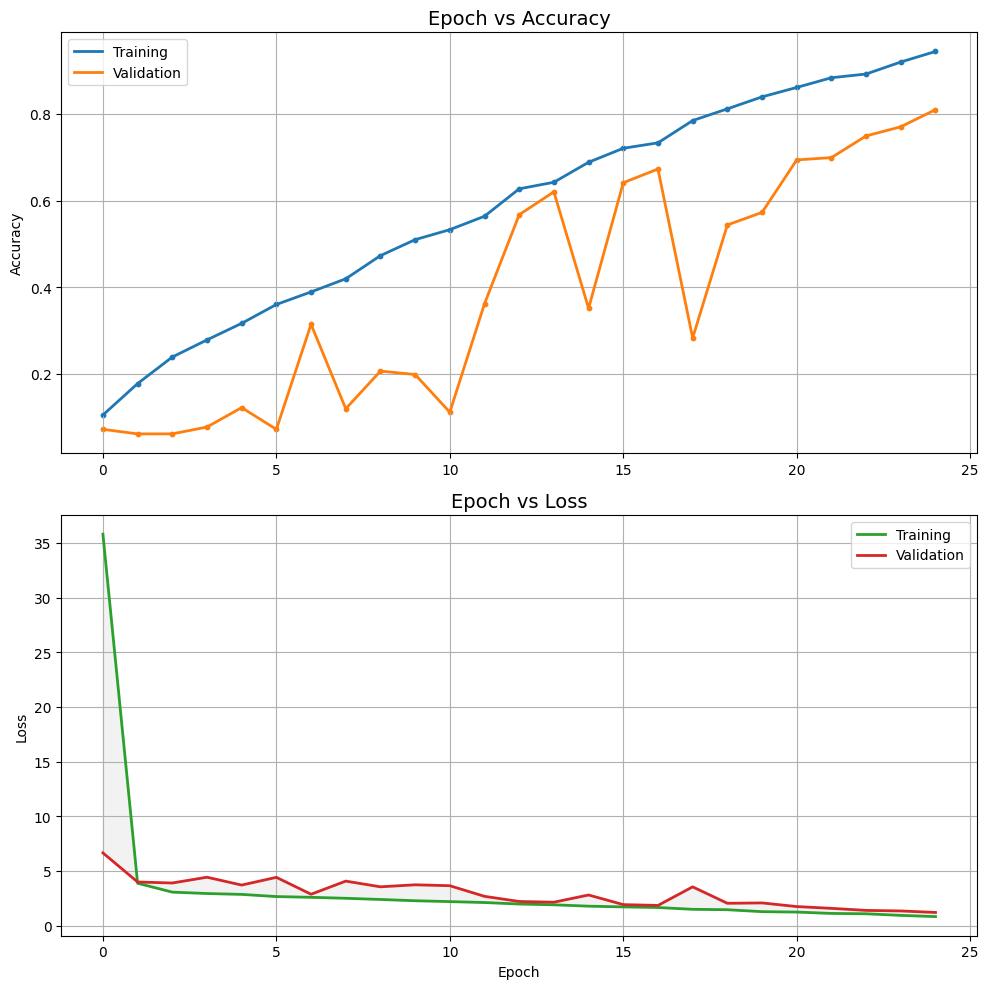

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 607ms/step


C:\Users\usr01\AppData\Local\Temp\ipykernel_55764\1034068986.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f1_scores = np.concatenate((f1_scores, [f1_scores[0]]))  # Close the circle


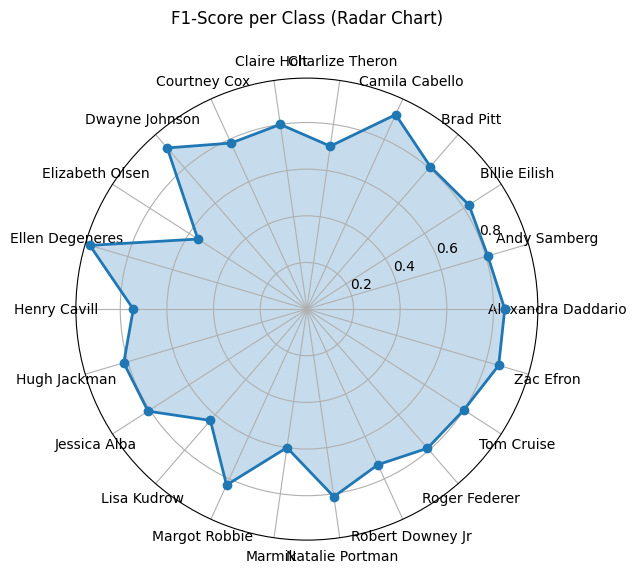

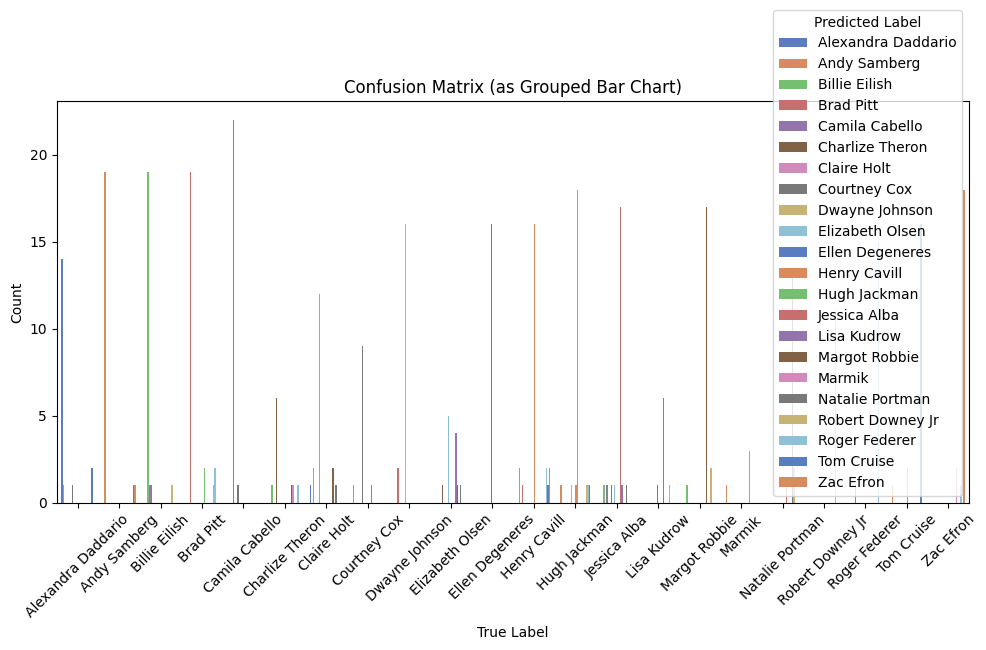

Overall Accuracy: 0.8100


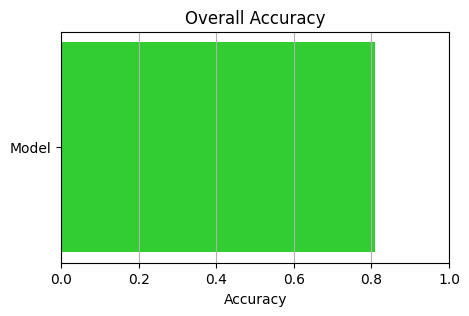

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Accuracy
ax[0].plot(history.history['accuracy'], label='Training', color='tab:blue', linewidth=2)
ax[0].plot(history.history['val_accuracy'], label='Validation', color='tab:orange', linewidth=2)
ax[0].scatter(range(len(history.history['accuracy'])), history.history['accuracy'], color='tab:blue', s=10)
ax[0].scatter(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], color='tab:orange', s=10)
ax[0].set_title('Epoch vs Accuracy', fontsize=14)
ax[0].set_ylabel('Accuracy')
ax[0].grid(True)
ax[0].legend()

# Loss
ax[1].plot(history.history['loss'], label='Training', color='tab:green', linewidth=2)
ax[1].plot(history.history['val_loss'], label='Validation', color='tab:red', linewidth=2)
ax[1].fill_between(range(len(history.history['loss'])), 
                   history.history['loss'], history.history['val_loss'], 
                   color='gray', alpha=0.1)
ax[1].set_title('Epoch vs Loss', fontsize=14)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

# --- 2. Radial/Spider chart for class-wise F1 scores ---
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
class_labels = label_encoder.inverse_transform(np.unique(y_train))

# Classification report as dict → DataFrame
report = classification_report(y_test, y_pred_classes, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).T

# Radar chart: F1-score per class
f1_scores = report_df.loc[class_labels, 'f1-score']
angles = np.linspace(0, 2 * np.pi, len(class_labels), endpoint=False).tolist()
f1_scores = np.concatenate((f1_scores, [f1_scores[0]]))  # Close the circle
angles += angles[:1]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, f1_scores, 'o-', linewidth=2, label="F1-Score")
ax.fill(angles, f1_scores, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), class_labels)
ax.set_title("F1-Score per Class (Radar Chart)", y=1.1)
ax.grid(True)
plt.show()

# --- 3. Confusion matrix as grouped bar chart ---
cm = confusion_matrix(y_test, y_pred_classes)
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

df_cm_melted = df_cm.reset_index().melt(id_vars='index')
df_cm_melted.columns = ['True Label', 'Predicted Label', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_cm_melted, x='True Label', y='Count', hue='Predicted Label', palette='muted')
plt.title('Confusion Matrix (as Grouped Bar Chart)')
plt.ylabel('Count')
plt.xlabel('True Label')
plt.legend(title='Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Overall accuracy gauge-like style ---
overall_accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

plt.figure(figsize=(5, 3))
plt.barh(['Model'], [overall_accuracy], color='limegreen')
plt.xlim(0, 1)
plt.title('Overall Accuracy')
plt.xlabel('Accuracy')
plt.grid(True, axis='x')
plt.show()


In [17]:
import pickle
with open('labelencoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import pickle

model = load_model('facerecognitionmodel.h5')

with open('labelencoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

img_path = 'ImagesHD/ImagesHD/Alexandra Daddario_56.jpg'  
image = Image.open(img_path).convert('RGB')
image = image.resize((128, 128))
image_array = np.array(image) / 255.0
image_array = image_array.reshape(1, 128, 128, 3)

prediction = model.predict(image_array)
predicted_index = np.argmax(prediction)
predicted_label = label_encoder.inverse_transform([predicted_index])[0]

image.show()
print(f"🔍 Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
🔍 Predicted Label: Alexandra Daddario
